In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split,StratifiedKFold

In [3]:
data=pd.read_csv(r'C:\Users\barath\Desktop\college\bank_fraudulant.csv')

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
data.shape

(6362620, 11)

In [6]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015300D4E160>,
      dtype=object)

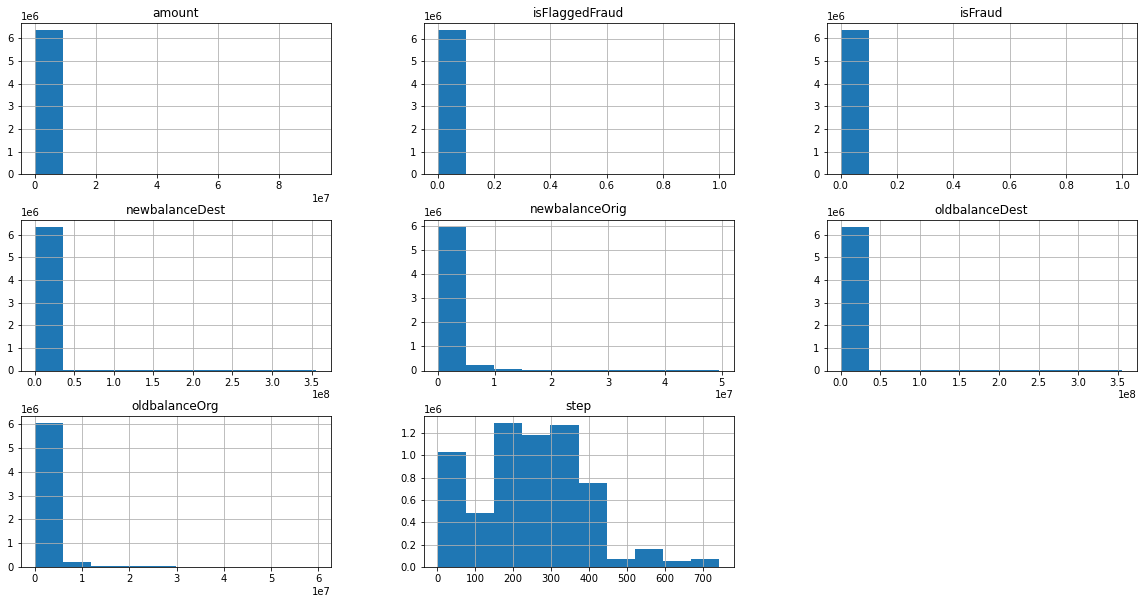

In [8]:
data.hist(figsize=(20,10))

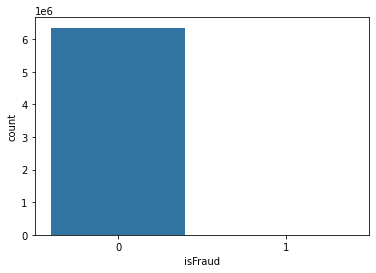

In [9]:
sns.countplot(data['isFraud'])

In [10]:
data['isFraud'].values.tolist().count(1)

8213

In [11]:
data['isFraud'].values.tolist().count(0)

6354407

# Random under sampling

In [12]:
Total_sample=5000
percent_0=60
percent_1=40
data0=data[data['isFraud']==0].sample(n=int((percent_0*Total_sample/100)))
data1=data[data['isFraud']==1].sample(n=int((percent_1*Total_sample/100)))


In [13]:
print(data0.shape)
data0.head()

(3000, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2890560,228,TRANSFER,655630.45,C1057773242,20847.0,0.00,C1171356020,0.00,655630.45,0,0
5184344,360,PAYMENT,3176.52,C272130381,22717.0,19540.48,M450694190,0.00,0.00,0,0
5497018,380,CASH_IN,207987.74,C629180227,41661.0,249648.74,C921824511,7887844.61,7679856.87,0,0
430648,18,CASH_IN,31543.56,C563348266,0.0,31543.56,C1890060906,0.00,0.00,0,0
5809858,401,CASH_OUT,339485.81,C962313268,0.0,0.00,C1370381007,3449544.32,3789030.13,0,0


In [14]:
print(data1.shape)
data1.head()

(2000, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6020229,460,TRANSFER,1424002.70,C777622163,1424002.70,0.0,C413417554,0.00,0.00,1,0
6294087,669,CASH_OUT,111033.79,C628538240,111033.79,0.0,C1203444656,470258.81,581292.59,1,0
5996406,425,CASH_OUT,10000000.00,C792080060,10000000.00,0.0,C2030266969,0.00,10000000.00,1,0
1173037,132,TRANSFER,2479940.21,C1242611758,2479940.21,0.0,C1769880049,0.00,0.00,1,0
6272317,621,TRANSFER,3054359.40,C817672066,3054359.40,0.0,C657457029,0.00,0.00,1,0


In [15]:
sampled_data=pd.concat([data0,data1],axis=0)
sampled_data.shape

(5000, 11)

In [16]:
shuffle_data=shuffle(sampled_data)
shuffle_data.head(100)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5537442,381,CASH_IN,75319.28,C1884151698,39381.00,114700.28,C430284471,4306561.85,4231242.56,0,0
2150273,184,CASH_OUT,197086.60,C1049910744,0.00,0.00,C1046580913,4653494.24,4850580.84,0,0
3759839,279,PAYMENT,9590.75,C370070990,51083.00,41492.25,M873644866,0.00,0.00,0,0
2801115,221,TRANSFER,1123561.68,C1234309969,1123561.68,0.00,C587188586,0.00,0.00,1,0
5990454,418,CASH_OUT,452261.67,C366045175,452261.67,0.00,C1443885284,577217.57,1029479.24,1,0
...,...,...,...,...,...,...,...,...,...,...,...
439315,18,CASH_IN,76027.81,C397508445,0.00,76027.81,C2120120397,4900963.92,4824936.11,0,0
2724584,211,TRANSFER,55920.39,C588214650,55920.39,0.00,C1302604885,0.00,0.00,1,0
139881,11,CASH_OUT,616342.30,C1046981347,0.00,0.00,C1615804266,7674201.51,8357420.76,0,0
6002476,428,CASH_OUT,155818.16,C724587036,28922.00,0.00,C291677267,199999.17,355817.33,0,0


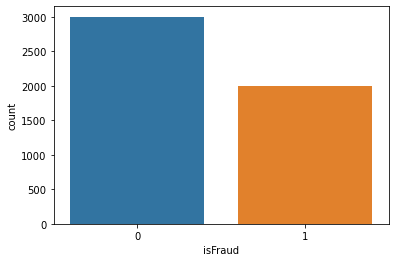

In [17]:
#RANDOM UNDER SAMPLING
sns.countplot(shuffle_data['isFraud'])

In [18]:
label_encoder=LabelEncoder()
columns=shuffle_data.columns
for cols in columns:
   # print(cols)
    if(isinstance(shuffle_data[cols].values[0],str)):
        shuffle_data[cols]=label_encoder.fit_transform(shuffle_data[cols].values)

In [19]:
x=shuffle_data.drop(['isFraud'],axis=1)
y=shuffle_data['isFraud']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.3,random_state=42)


In [21]:
x_train.shape

(3500, 10)

In [22]:
y_train.shape


(3500,)

In [23]:
y_test.shape

(1500,)

In [24]:
x_train.iloc[0,:]

step                45.00
type                 3.00
amount            5027.64
nameOrig          2624.00
oldbalanceOrg      365.00
newbalanceOrig       0.00
nameDest          4093.00
oldbalanceDest       0.00
newbalanceDest       0.00
isFlaggedFraud       0.00
Name: 995184, dtype: float64

In [25]:
Nb=GaussianNB()
Nb.fit(x_train, y_train)
Nb.score(x_test,y_test)

0.7026666666666667

In [26]:
rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train, y_train)
rf.score(x_test,y_test)

0.9793333333333333

# Bagging

In [27]:
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=False))
model.fit(x_train, y_train)
model.score(x_test,y_test)


0.9793333333333333